In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy.polynomial.polynomial as poly
from scipy.interpolate import UnivariateSpline

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
with fits.open('ADAP_Subgiants/DistantClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas().reset_index(drop=True)
df['Cluster'].unique()

array(['NGC0752 ', 'NGC1039 ', 'Trump02 ', 'NGC0884 ', 'NGC0869 ',
       'Stock2  ', 'NGC0188 ', 'NGC2682 ', 'NGC7092 ', 'NGC6793 ',
       'NGC2232 ', 'NGC2422 ', 'NGC2437 ', 'NGC2423 ', 'NGC2360 ',
       'NGC2323 ', 'NGC2548 ', 'NGC2168 ', 'NGC2158 ', 'NGC6475 ',
       'NGC6405 ', 'NGC6774 ', 'IC4725  ', 'IC4756  ', 'NGC6633 ',
       'IC4665  ', 'NGC1901 ', 'NGC2516 ', 'NGC2547 ', 'Trump10 ',
       'NGC3532 ', 'NGC3228 ', 'Coll140 ', 'NGC2447 ', 'NGC6025 ',
       'IC4651  ', 'NGC6281 '], dtype=object)

In [33]:
with fits.open('ADAP_Subgiants/NearbyClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas().reset_index(drop=True)
df['Cluster'].unique()

array(['Hyades  ', 'Pleiades', 'alphaPer', 'Praesepe', 'ComaBer ',
       'Blanco1 ', 'IC2602  ', 'IC2391  ', 'NGC2451 '], dtype=object)

In [37]:
list(df.columns)

['dr2_source_id',
 'dr3_source_id',
 'Cluster',
 'SimbadName_cluster',
 'e_plx_cluster',
 'plx_cluster',
 'skymapper_id',
 'sdss_id',
 'twomass_id',
 'allwise_id',
 'ra2000',
 'dec2000',
 'gmag',
 'bpmag',
 'rpmag',
 'parallax',
 'parallax_error',
 'ruwe',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_n_obs',
 'gmag_edr3',
 'bpmag_edr3',
 'rpmag_edr3',
 'r_lo_geo',
 'r_med_geo',
 'r_hi_geo',
 'r_lo_photogeo',
 'r_med_photogeo',
 'r_hi_photogeo',
 'objid_NUV',
 'NUVmag',
 'e_NUVmag',
 'Nafl',
 'objid_FUV',
 'FUVmag',
 'e_FUVmag',
 'Fafl',
 'psfMag_uSDSS',
 'psfMagErr_uSDSS',
 'psfMag_gSDSS',
 'psfMagErr_gSDSS',
 'psfMag_rSDSS',
 'psfMagErr_rSDSS',
 'psfMag_iSDSS',
 'psfMagErr_iSDSS',
 'psfMag_zSDSS',
 'psfMagErr_zSDSS',
 'u_flags',
 'u_nimaflags',
 'u_ngood',
 'e_u_psf',
 'u_psf',
 'v_flags',
 'v_nimaflags',
 'v_ngood',
 'e_v_psf',
 'v_psf',
 'g_flags',
 'g_nimaflags',
 'g_ngood',
 'g_psf',
 'e_g_psf',
 'r_flags',
 'r_nimaflags',
 'r_ngood',
 'r_psf',
 'e_r_psf',
 'i_flags',


In [47]:
print(df[df['dec2000'] < 0])

            dr2_source_id        dr3_source_id   Cluster  \
3165  2313587385004219264  2313587385004219264  Blanco1    
3166  2313683012452139008  2313683012452139008  Blanco1    
3167  2314214110928211712  2314214110928211712  Blanco1    
3168  2314329868886644992  2314329868886644992  Blanco1    
3169  2314459989215604608  2314459989215604608  Blanco1    
...                   ...                  ...       ...   
5322  5588297328832904832  5588297328832904832  NGC2451    
5323  5588530670115602688  5588530670115602688  NGC2451    
5324  5588830832484895616  5588830832484895616  NGC2451    
5325  5591359919690963200  5591359919690963200  NGC2451    
5326  5591438461751521152  5591438461751521152  NGC2451    

         SimbadName_cluster  e_plx_cluster  plx_cluster         skymapper_id  \
3165  Blanco1                        0.003        4.216              9462571   
3166  Blanco1                        0.003        4.216              9633740   
3167  Blanco1                        0.

In [5]:
df_cluster = df[(df['Cluster'] == 'alphaPer')]

df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)
asassn = df_cluster[df_cluster['asassn_name'].str.contains("ASASSN")]
df_cluster = df_cluster.drop(asassn.index).sort_values(by=['gmag']).reset_index(drop=True)

<ipython-input-5-ee473438f4e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


In [6]:
g = df_cluster['gmag']
bprp = df_cluster['bpmag'] - df_cluster['rpmag']
cluster = str(df_cluster['Cluster'][0])

min_g = min(g)
max_g = max(g)

In [7]:
df_cluster

,dr2_source_id,dr3_source_id,Cluster,SimbadName_cluster,e_plx_cluster,plx_cluster,skymapper_id,sdss_id,twomass_id,allwise_id,...,cc_flags,ext_flg,ph_qual_2,moon_lev,asassn_name,Mean Vmag_ASASSN,amplitude_ASASSN,period_ASASSN,Type_ASASSN,class_probability_ASASSN
0,441416161501150848,441416161501150848,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,,J032803.09+490346.1,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
1,442501619995081088,442501619995081088,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03190764+5005420,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
2,442550823139950080,442550823139950080,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03183775+5013200,J031837.78+501319.5,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
3,242889338420659968,242889338420659968,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,1237670962171281620,03292627+4656162,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
4,248960223149560960,248960223149560960,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03313314+4751447,J033133.15+475144.4,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,442644449127465600,442644449127465600,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03232035+5057242,J032320.39+505723.9,...,0000,0,AAUU,0000,,NaN,NaN,NaN,,NaN
672,249689332505535872,249689332505535872,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03354735+4917430,J033547.38+491742.8,...,0000,0,AAUU,0000,,NaN,NaN,NaN,,NaN
673,436481377216828800,436481377216828800,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03172753+4936529,J031727.58+493652.7,...,0000,0,AACC,0000,,NaN,NaN,NaN,,NaN
674,441820330803357568,441820330803357568,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03291874+5022108,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN


Text(0.5, 1.0, 'alphaPer')

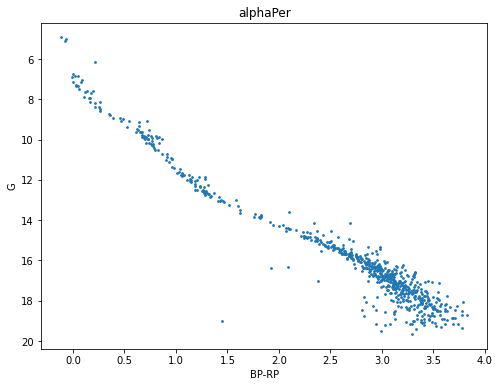

In [8]:
plt.scatter(bprp, g, s=3)
plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('G')
plt.title(cluster)

Text(0.5, 1.0, 'alphaPer')

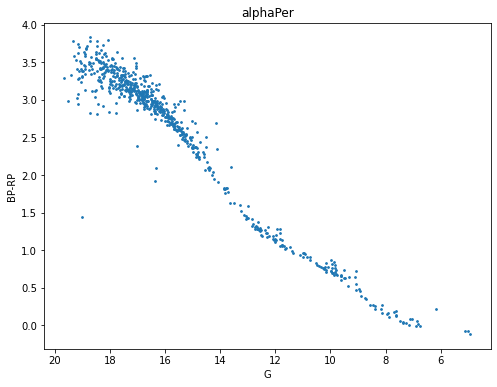

In [9]:
plt.scatter(g, bprp, s=3)
plt.gca().invert_xaxis()
plt.xlabel('G')
plt.ylabel('BP-RP')
plt.title(cluster)

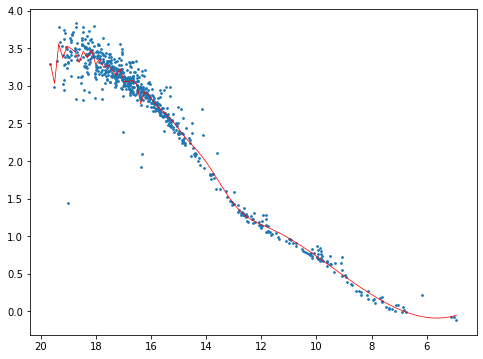

In [10]:
spl = UnivariateSpline(g, bprp)
xs = np.linspace(min_g, max_g, 100)
spl.set_smoothing_factor(15)
plt.gca().invert_xaxis()
plt.scatter(g, bprp, s=3)
plt.plot(xs, spl(xs), 'r-', lw=0.75, label='Univariate spline')
plt.show()

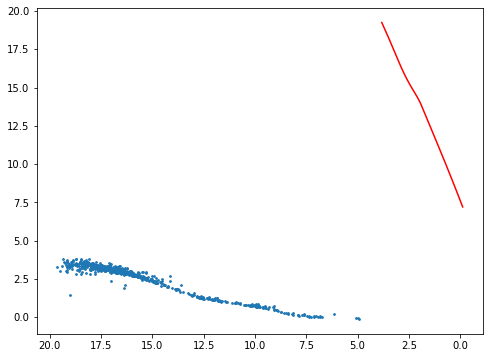

In [11]:
import statsmodels.nonparametric.api as sm
lowess = sm.lowess


z = lowess(g,bprp, return_sorted=True)
x = z[:,0] #x value of the fitted lowess
y = z[:,1] #y value of the fitted lowess
plt.plot(x, y, 'r-', label="LOWESS regression")
plt.gca().invert_xaxis()
plt.scatter(g, bprp, s=3)

In [12]:
# import wget
# wget.download('https://github.com/jieunchoi/MIST_codes/raw/master/scripts/' +
#          'read_mist_models.py')

In [13]:
import read_mist_models

iso = read_mist_models.ISO('MIST_iso_6266f5489e169.iso')

print('version: ', iso.version)
print( 'abundances: ', iso.abun)
print ('rotation: ', iso.rot)
print ('ages: ', [round(x,2) for x in iso.ages])
print ('number of ages: ', iso.num_ages)
print ('available columns: ', iso.hdr_list)

Reading in: MIST_iso_6266f5489e169.iso
version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'log_L', 'log_LH', 'log_LHe', 'log_Teff', 'log_R', 'log_g', 'surface_h1', '

In [14]:
age_ind = iso.age_index(np.log10(52000000)) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']

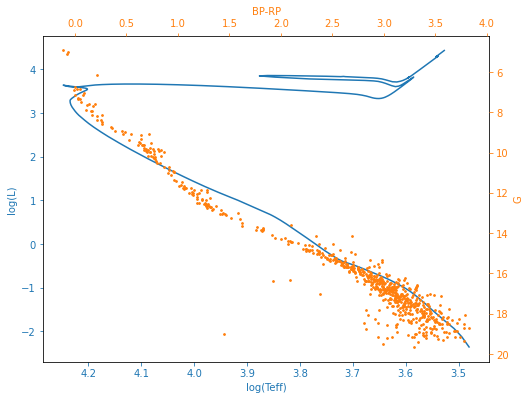

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(logTeff, logL, color="C0")
ax.invert_xaxis()
ax.set_xlabel('log(Teff)', color="C0")
ax.set_ylabel('log(L)', color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
# ax.axis([5.2, 3.3, -4, 5])

ax2.scatter(bprp, g, s=3, color="C1")
ax2.invert_yaxis()
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('BP-RP', color="C1") 
ax2.set_ylabel('G', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.show()

In [16]:
plt.rcParams["figure.figsize"] = (14,6)

In [179]:
def analyze_cluster(name, factor):
    
#     plt.rcParams["figure.figsize"] = (8,6)
    
    df_cluster = df[(df['Cluster'] == name)]

    df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)
    asassn = df_cluster[df_cluster['asassn_name'].str.contains("ASASSN")]
    df_cluster = df_cluster.drop(asassn.index).sort_values(by=['gmag']).reset_index(drop=True)
    
    g = df_cluster['gmag']
    bprp = df_cluster['bpmag'] - df_cluster['rpmag']
    cluster = str(df_cluster['Cluster'][0]).rstrip()
    min_g = min(g)
    max_g = max(g)
    
#     plt.scatter(g, bprp, s=3)
#     plt.gca().invert_xaxis()
#     plt.xlabel('G')
#     plt.ylabel('BP-RP')
#     plt.title(cluster)
#     plt.close()

    predict = UnivariateSpline(g, bprp)
    predict.set_smoothing_factor(factor)
    x_lin_reg = np.linspace(min_g, max_g, 100)
    y_lin_reg = predict(x_lin_reg)
#     plt.gca().invert_xaxis()
#     plt.scatter(g, bprp, s=3)
#     plt.plot(x_lin_reg, y_lin_reg, 'r-', lw=0.75, label='Univariate spline')
#     plt.close()
    
    diff = []
    sigma = []

    for i in range(len(g)):
        predicted = predict(g[i])    
        if g[i] < 13:
            unc = 0.002*20
#             diff.append(predicted - bprp[i])
            diff.append(np.abs(bprp[i] - predicted))
            sigma.append(np.sqrt(2)*unc)
        elif 13 <= g[i] < 18:
            unc = 0.010*4
#             diff.append(bprp[i] - predicted)
            diff.append(np.abs(bprp[i] - predicted))
            sigma.append(np.sqrt(2)*unc)
        else:
            unc = 0.200
            diff.append(np.abs(bprp[i] - predicted))
            sigma.append(np.sqrt(2)*unc)
    
    # Extract the outliers
    x_2sigma = [] # g outside of the 2 sigma value
    y_2sigma = [] # corresponding bp-rp values
    x_1_5sigma = []
    y_1_5sigma = []
    x_1sigma = []
    y_1sigma = []
    x_good = []
    y_good = []
    
    for i in range(len(diff)):
        if diff[i] >= 2*sigma[i]:
            x_2sigma.append(g[i])
            y_2sigma.append(bprp[i])
        elif diff[i] >= 1.5*sigma[i]:
            x_1_5sigma.append(g[i])
            y_1_5sigma.append(bprp[i])
        elif diff[i] >= sigma[i]:
            x_1sigma.append(g[i])
            y_1sigma.append(bprp[i])
        else:
            x_good.append(g[i])
            y_good.append(bprp[i])
    
    # plot the good values alongside the rejected values (with different colors for sigma value) and the fitted line
    plt.scatter(x_good, y_good, s=3, label = 'Good points')
    plt.scatter(x_2sigma, y_2sigma, s=3, label = '2 sigma rejection')
    plt.scatter(x_1_5sigma, y_1_5sigma, s=3,label = '1.5 sigma rejection')
    plt.scatter(x_1sigma, y_1sigma, s=3, label = '1 sigma rejection')
    plt.plot(x_lin_reg, y_lin_reg, 'r-', lw=0.75, label='Univariate spline')

    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    plt.savefig('Figures/'+cluster+'_rejection.jpg')
    plt.close()
    
    # dropping all data outside 2 sigma
    df_copy = df_cluster.copy()

    # delete the outlier stars in the copied dataframe
    for i in x_2sigma:
        df_copy.drop(df_copy.index[df_copy['gmag'] == i], inplace = True)
#     for i in x_1_5sigma:
#         df_copy.drop(df_copy.index[df_copy['gmag'] == i], inplace = True)
#     for i in x_1sigma:
#         df_copy.drop(df_copy.index[df_copy['gmag'] == i], inplace = True)

    df_copy = df_copy.reset_index(drop=True)
    g_good = df_copy['gmag']
    print(len(df_copy))
    bprp_good = df_copy['bpmag'] - df_copy['rpmag']
    df_copy.to_csv('Good Points CSVs/'+cluster+'_courtney_goodpts.csv')

    plt.scatter(g_good, bprp_good, s=3, label = 'Not rejected at 2 sigma')
    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    plt.close()
    
    # making plot with isochrone overlay
#     fig=plt.figure()
#     ax=fig.add_subplot(111, label="1")
#     ax2=fig.add_subplot(111, label="2", frame_on=False)

#     ax.plot(logTeff, logL, color="C0")
#     ax.invert_xaxis()
#     ax.set_xlabel('log(Teff)', color="C0")
#     ax.set_ylabel('log(L)', color="C0")
#     ax.tick_params(axis='x', colors="C0")
#     ax.tick_params(axis='y', colors="C0")

#     ax2.scatter(bprp_good, g_good, s=3, color="C1", label = 'Not rejected at 2 sigma')
#     ax2.invert_yaxis()
#     ax2.xaxis.tick_top()
#     ax2.yaxis.tick_right()
#     ax2.set_xlabel('BP-RP', color="C1") 
#     ax2.set_ylabel('G', color="C1")       
#     ax2.xaxis.set_label_position('top') 
#     ax2.yaxis.set_label_position('right') 
#     ax2.tick_params(axis='x', colors="C1")
#     ax2.tick_params(axis='y', colors="C1")

#     plt.savefig('Figures/'+cluster+'_isochrone.jpg')
#     plt.close()
    
    # making side-by-side plots of original data vs non-rejected data
    plt.rcParams["figure.figsize"] = (14,6)
    
    plt.subplot(1,2,1)
    plt.scatter(g, bprp, s=3, label = 'Original')
    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.scatter(g_good, bprp_good, s=3, label = 'Not rejected at 2 sigma')
    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    
    plt.savefig('Figures/'+cluster+'_sidebyside.jpg')
    
    df_copy.to_csv('Good Points CSVs/'+cluster+'_courtney_goodpts.csv')
    
    return df_copy

In [180]:
df['Cluster'].unique()

array(['Hyades  ', 'Pleiades', 'alphaPer', 'Praesepe', 'ComaBer ',
       'Blanco1 ', 'IC2602  ', 'IC2391  ', 'NGC2451 '], dtype=object)

<ipython-input-155-c866ddcd1d7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


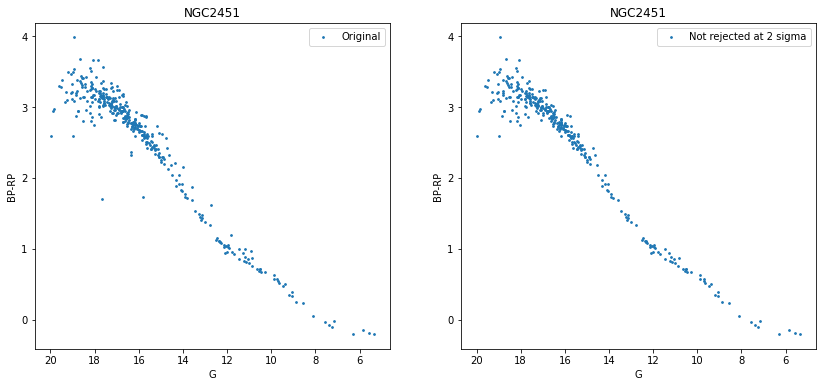

In [157]:
df_final = analyze_cluster('NGC2451 ', 5)

<ipython-input-134-c866ddcd1d7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


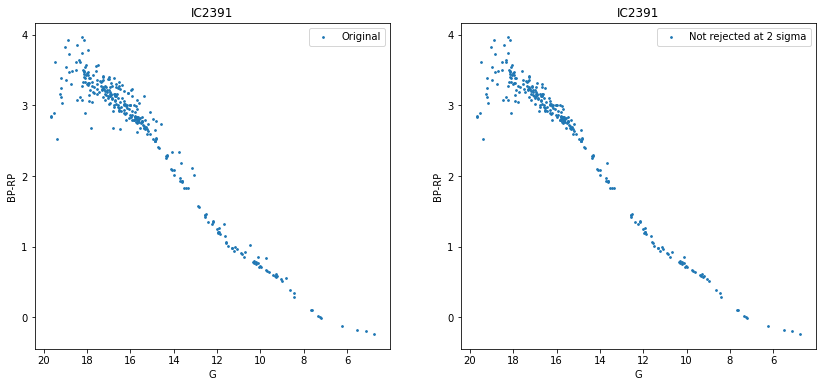

In [136]:
df_final = analyze_cluster('IC2391  ', 5)

<ipython-input-119-2abf52cc934e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


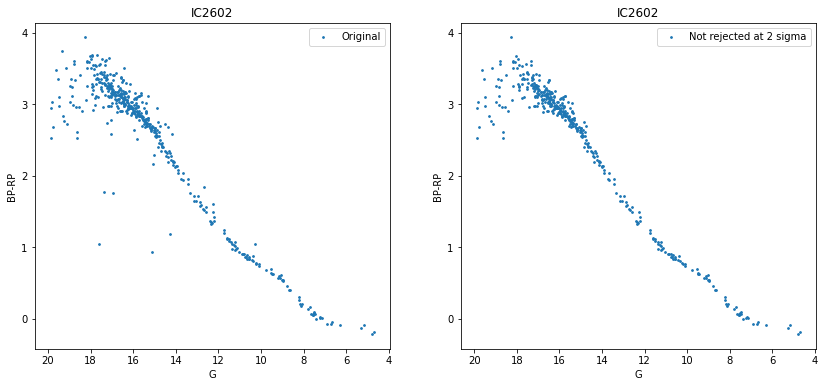

In [123]:
df_final = analyze_cluster('IC2602  ', 15)

<ipython-input-179-e0ac12ec2882>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


423


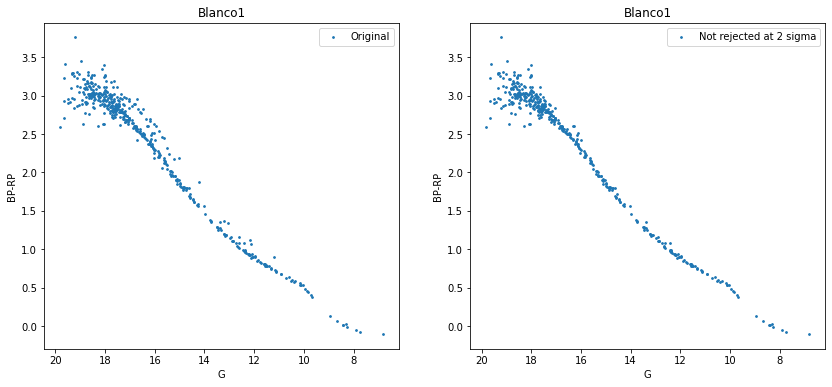

In [181]:
df_final = analyze_cluster('Blanco1 ', 5)

<ipython-input-155-c866ddcd1d7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


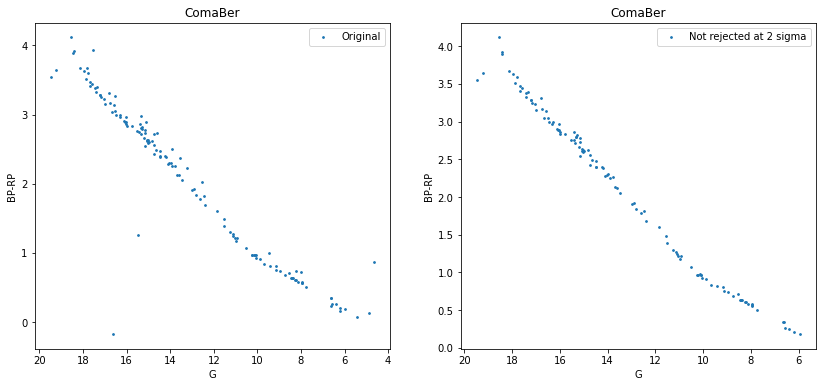

In [162]:
df_final = analyze_cluster('ComaBer ', 20)

<ipython-input-155-c866ddcd1d7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


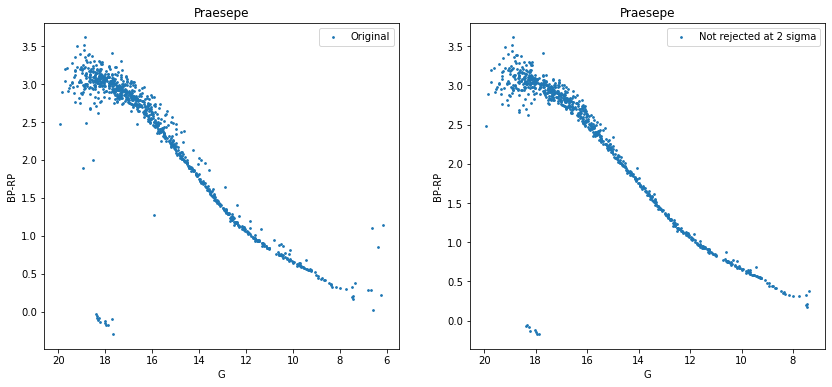

In [161]:
df_final = analyze_cluster('Praesepe', 30)

<ipython-input-155-c866ddcd1d7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


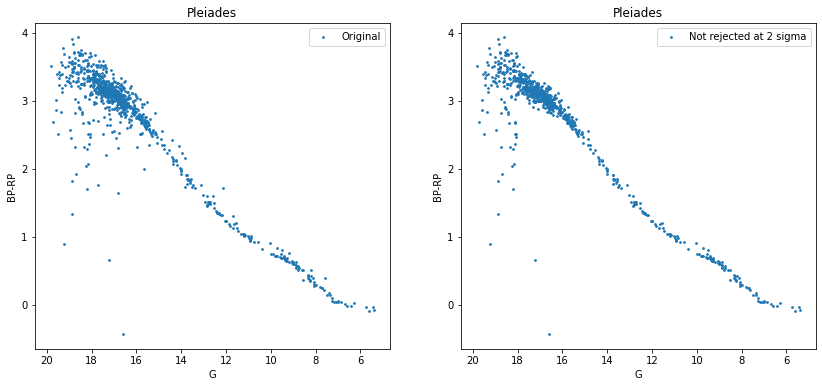

In [159]:
df_final = analyze_cluster('Pleiades', 20)

<ipython-input-173-fd9edf5bd54c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


627


dr2_source_id                  441433337069997696
dr3_source_id                  441433337069997696
Cluster                                  alphaPer
SimbadName_cluster          alpha Per cluster    
e_plx_cluster                               0.005
                                    ...          
Mean Vmag_ASASSN                              NaN
amplitude_ASASSN                              NaN
period_ASASSN                                 NaN
Type_ASASSN                                      
class_probability_ASASSN                      NaN
Name: 626, Length: 109, dtype: object

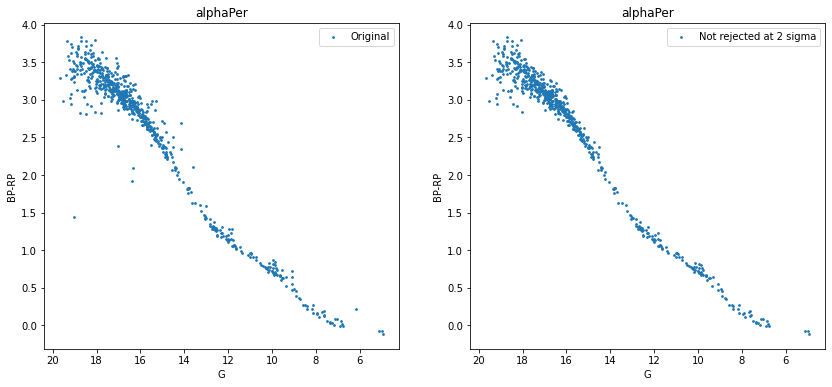

In [175]:
df_final = analyze_cluster('alphaPer', 15)
df_final.iloc[626]

<ipython-input-173-fd9edf5bd54c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


331


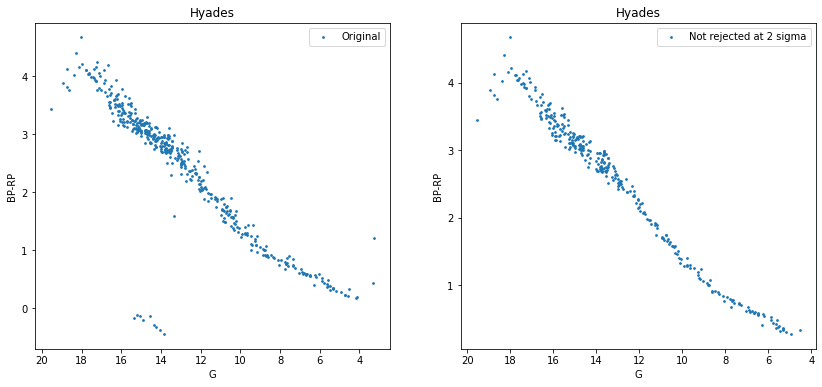

In [176]:
df_final = analyze_cluster('Hyades  ', 50)

In [165]:
# for i in df['Cluster'].unique():
#     df_final = analyze_cluster(i, 15)
#     plt.close()

In [20]:
df2 = df_final[(13 < df_final['gmag']) & (df_final['gmag'] < 18)].reset_index(drop=True)

df2

,dr2_source_id,dr3_source_id,Cluster,SimbadName_cluster,e_plx_cluster,plx_cluster,skymapper_id,sdss_id,twomass_id,allwise_id,...,cc_flags,ext_flg,ph_qual_2,moon_lev,asassn_name,Mean Vmag_ASASSN,amplitude_ASASSN,period_ASASSN,Type_ASASSN,class_probability_ASASSN
0,442084561489950720,442084561489950720,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03374799+5059380,J033748.01+505937.7,...,0000,0,AAAU,0000,,NaN,NaN,NaN,,NaN
1,249364465476847744,249364465476847744,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03342934+4921434,J033429.36+492143.2,...,0000,0,AAAU,0000,,NaN,NaN,NaN,,NaN
2,249885187311137408,249885187311137408,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03381031+5016262,J033810.33+501626.0,...,0000,0,AAAC,0000,,NaN,NaN,NaN,,NaN
3,436536838133473408,436536838133473408,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03170754+4958400,J031707.58+495839.8,...,0h00,0,AAAU,0000,,NaN,NaN,NaN,,NaN
4,441372971309927936,441372971309927936,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03253191+4830110,J032531.93+483010.7,...,0000,0,AAAU,0000,,NaN,NaN,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,248278418566454656,248278418566454656,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,1237670959487714380,03445038+4708145,J034450.40+470814.0,...,0000,0,AAUU,0111,,NaN,NaN,NaN,,NaN
395,436816801281428736,436816801281428736,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03141573+5039060,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
396,441517621509832576,441517621509832576,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03283027+4923233,J032830.30+492323.1,...,0O00,0,AAUU,0000,,NaN,NaN,NaN,,NaN
397,435334625247485696,435334625247485696,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03224066+4800337,J032240.70+480033.3,...,0000,0,AACU,0000,,NaN,NaN,NaN,,NaN


In [21]:
df2.to_csv('Good Points CSVs/'+str(cluster)+'_courtney_goodpts.csv')